## 1.导包

In [1]:

import os
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号 


#ignore warnings
import warnings
warnings.filterwarnings('ignore')



#设置行不限制数量
#pd.set_option('display.max_rows',None)
#最后的的参数可以限制输出行的数量

#设置列不限制数量
pd.set_option('display.max_columns',None)

In [2]:
!ls

DataTransforme.ipynb
bobo_ML.ipynb
公开数据集
更新数据集
加油站营销推荐算法-MPC V1.0 final.pdf


In [3]:
!ls 公开数据集/

Bank_data.csv          PetrolStation_data.csv VehicleSystem_data.csv


## 2.初步探索数据

In [4]:
bank = pd.read_csv('./公开数据集/Bank_data.csv')
petro = pd.read_csv('./公开数据集/PetrolStation_data.csv')
vehicle = pd.read_csv('./公开数据集/VehicleSystem_data.csv')

In [5]:
bank.shape

(2537, 12)

In [6]:
petro.shape

(2537, 6)

In [7]:
vehicle.shape

(2537, 7)

In [8]:
#拼接三张表
origin_data = pd.concat([bank, petro, vehicle], axis=1)

In [9]:
origin_data.describe(include = 'all')

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,ID,weather,time,coupon,expiration,Y,ID,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
count,2537.00000,2537,2537,2537,2537,2537,2537,2522,2506,2510,2521,2503,2537.00000,2537,2537,2537,2537,2537.000000,2537.00000,2537,2537,2537.000000,2537.000000,2537.000000,2537.000000
unique,NaN,2,8,5,6,25,9,5,5,5,5,5,NaN,3,5,5,2,NaN,NaN,3,4,NaN,NaN,NaN,NaN
top,NaN,Male,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,Sunny,6PM,Coffee House,1d,NaN,NaN,No Urgent Place,Alone,NaN,NaN,NaN,NaN
freq,NaN,1269,567,1036,883,372,408,992,676,941,1099,1249,NaN,2006,654,754,1437,NaN,NaN,1204,1493,NaN,NaN,NaN,NaN
mean,16465.87229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16465.87229,NaN,NaN,NaN,NaN,0.568388,16465.87229,NaN,NaN,0.569176,0.131257,0.223492,0.776508
std,3656.59043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3656.59043,NaN,NaN,NaN,NaN,0.495399,3656.59043,NaN,NaN,0.495289,0.337748,0.416668,0.416668
min,10004.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10004.00000,NaN,NaN,NaN,NaN,0.000000,10004.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,13268.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13268.00000,NaN,NaN,NaN,NaN,0.000000,13268.00000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,16538.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16538.00000,NaN,NaN,NaN,NaN,1.000000,16538.00000,NaN,NaN,1.000000,0.000000,0.000000,1.000000
75%,19660.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19660.00000,NaN,NaN,NaN,NaN,1.000000,19660.00000,NaN,NaN,1.000000,0.000000,0.000000,1.000000


In [10]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,ID,weather,time,coupon,expiration,Y,ID,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,11263,Male,50plus,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,11263,Sunny,2PM,Coffee House,1d,1,11263,No Urgent Place,Friend(s),0,0,0,1
1,20136,Female,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,20136,Sunny,7AM,Bar,1d,0,20136,Work,Alone,1,0,1,0
2,14763,Female,50plus,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,14763,Sunny,7AM,Coffee House,1d,0,14763,Work,Alone,1,0,0,1
3,12612,Female,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,12612,Sunny,10AM,Carry out & Take away,2h,0,12612,No Urgent Place,Kid(s),1,0,0,1
4,17850,Female,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,17850,Snowy,2PM,Coffee House,2h,0,17850,No Urgent Place,Partner,1,0,0,1


In [11]:
#display(origin_data.T.drop_duplicates(keep='first').T)
# 删除 重复的列
origin_data = origin_data.T.drop_duplicates(keep='first').T 

In [12]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,11263,Male,50plus,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1
1,20136,Female,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0
2,14763,Female,50plus,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1
3,12612,Female,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1
4,17850,Female,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1


In [13]:
#修剪age列，将50plus替换为55，below21替换为15
# 当然可以通过lambda 函数将这个比较简单的函数一行带过
origin_data['age'] = origin_data["age"].apply(lambda x: x.replace("50plus","55"))
origin_data['age'] = origin_data["age"].apply(lambda x: x.replace("below21","15"))
#将性别（male/female)映射为数值（1/0）
origin_data['gender'] = origin_data["gender"].apply(lambda x: x.replace("Male","1"))
origin_data['gender'] = origin_data["gender"].apply(lambda x: x.replace("Female","0"))

In [14]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,11263,1,55,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1
1,20136,0,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0
2,14763,0,55,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1
3,12612,0,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1
4,17850,0,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1


In [15]:
#将这三列转为 int 型
origin_data[['ID','gender','age']] = origin_data[['ID','gender','age']].astype('int64')

In [16]:
origin_data.describe(include="all")

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
count,2537.00000,2537.000000,2537.000000,2537,2537,2537,2537,2522,2506,2510,2521,2503,2537,2537,2537,2537,2537.0,2537,2537,2537.0,2537.0,2537.0,2537.0
unique,NaN,NaN,NaN,5,6,25,9,5,5,5,5,5,3,5,5,2,2.0,3,4,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,Sunny,6PM,Coffee House,1d,1.0,No Urgent Place,Alone,1.0,0.0,0.0,1.0
freq,NaN,NaN,NaN,1036,883,372,408,992,676,941,1099,1249,2006,654,754,1437,1442.0,1204,1493,1444.0,2204.0,1970.0,1970.0
mean,16465.87229,0.500197,32.729602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3656.59043,0.500099,11.761338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10004.00000,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13268.00000,0.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16538.00000,1.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19660.00000,1.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2537 non-null   int64 
 1   gender                2537 non-null   int64 
 2   age                   2537 non-null   int64 
 3   maritalStatus         2537 non-null   object
 4   education             2537 non-null   object
 5   occupation            2537 non-null   object
 6   income                2537 non-null   object
 7   Bar                   2522 non-null   object
 8   CoffeeHouse           2506 non-null   object
 9   CarryAway             2510 non-null   object
 10  RestaurantLessThan20  2521 non-null   object
 11  Restaurant20To50      2503 non-null   object
 12  weather               2537 non-null   object
 13  time                  2537 non-null   object
 14  coupon                2537 non-null   object
 15  expiration            2537 non-null   

## Age feature

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


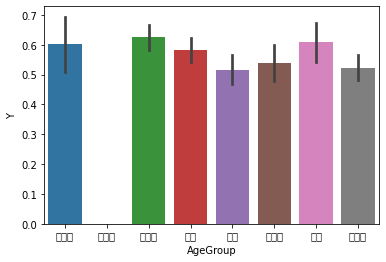

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
0,11263,1,55,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,快退休
1,20136,0,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,社畜
2,14763,0,55,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,快退休
3,12612,0,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,领导
4,17850,0,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,白领


In [18]:
##将[年龄]这一特征，进行分箱。
bins = [10,15,20,25,30, 35,40,45,60]##数据处理 封箱操作
labels = ['小学生', '大学生', '研究生', '社畜', '白领', '小组长', '领导', '快退休']
origin_data['AgeGroup'] = pd.cut(origin_data["age"], bins, labels = labels)
#draw a bar plot of Age vs. Y
sns.barplot(x="AgeGroup", y = "Y", data = origin_data)
plt.show()
origin_data.head()

In [19]:
# 分箱后，再转化为数值
# 将Age映射为数值int
age_mapping = {'小学生':1, '大学生':2, '研究生':3, '社畜':4, '白领':5, '小组长':6, '领导':7, '快退休':8}
origin_data['AgeGroup'] = origin_data['AgeGroup'].map(age_mapping)

In [20]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
0,11263,1,55,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8
1,20136,0,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4
2,14763,0,55,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8
3,12612,0,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7
4,17850,0,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5


## maritalStatus featurre

In [21]:
#先查看 缺失值情况
origin_data['maritalStatus'].isnull().sum()

0

In [22]:
# 再查看 maritalStatus 特征信息。
origin_data['maritalStatus'].value_counts()

Married partner      1036
Single                949
Unmarried partner     433
Divorced               96
Widowed                23
Name: maritalStatus, dtype: int64

发现基本分好桶了，直接转化为数值即可。

In [23]:
# 将maritalStatus映射为数值int
maritalStatu_mapping = {'Married partner':1, 'Single':2, 'Unmarried partner':3, 'Divorced':4, 'Widowed':5}
origin_data['maritalStatus'] = origin_data['maritalStatus'].map(maritalStatu_mapping)

In [24]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
0,11263,1,55,5,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8
1,20136,0,26,1,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4
2,14763,0,55,2,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8
3,12612,0,41,1,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7
4,17850,0,31,1,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5


## education feature

In [25]:
#先查看 缺失值情况
origin_data['education'].isnull().sum()

0

In [26]:
# 再查看education 特征信息
origin_data['education'].value_counts()

Some college - no degree                  883
Bachelors degree                          880
Graduate degree (Masters or Doctorate)    361
Associates degree                         212
High School Graduate                      187
Some High School                           14
Name: education, dtype: int64

In [27]:
# 将education映射为数值int
education_mapping = {'Some college - no degree':1, 'Bachelors degree':2, 'Graduate degree (Masters or Doctorate)':3, 'Associates degree':4, 'High School Graduate':5, 'Some High School':5}
origin_data['education'] = origin_data['education'].map(education_mapping)

In [28]:
origin_data.sample(5)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
385,16030,0,26,3,1,Management,$37500 - $49999,less1,less1,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,4
1671,10635,0,41,2,1,Office & Administrative Support,$25000 - $37499,less1,1~3,1~3,1~3,never,Sunny,10AM,Bar,1d,1,No Urgent Place,Friend(s),0,0,0,1,7
2330,19233,1,55,1,1,Office & Administrative Support,$62500 - $74999,1~3,never,1~3,1~3,less1,Sunny,10PM,Restaurant(<20),1d,1,No Urgent Place,Alone,0,0,0,1,8
503,16648,1,26,3,1,Transportation & Material Moving,$12500 - $24999,1~3,4~8,1~3,4~8,less1,Sunny,10PM,Restaurant(20-50),1d,0,No Urgent Place,Alone,0,0,0,1,4
1920,10361,1,31,1,3,Computer & Mathematical,$100000 or More,less1,1~3,4~8,4~8,4~8,Sunny,7AM,Restaurant(20-50),1d,0,Work,Alone,1,0,0,1,5


In [29]:
origin_data.describe(include = 'all')

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
count,2537.00000,2537.000000,2537.000000,2537.000000,2537.000000,2537,2537,2522,2506,2510,2521,2503,2537,2537,2537,2537,2537.0,2537,2537,2537.0,2537.0,2537.0,2537.0,2537.0
unique,NaN,NaN,NaN,NaN,NaN,25,9,5,5,5,5,5,3,5,5,2,2.0,3,4,2.0,2.0,2.0,2.0,7.0
top,NaN,NaN,NaN,NaN,NaN,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,Sunny,6PM,Coffee House,1d,1.0,No Urgent Place,Alone,1.0,0.0,0.0,1.0,3.0
freq,NaN,NaN,NaN,NaN,NaN,372,408,992,676,941,1099,1249,2006,654,754,1437,1442.0,1204,1493,1444.0,2204.0,1970.0,1970.0,567.0
mean,16465.87229,0.500197,32.729602,1.865195,2.199054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3656.59043,0.500099,11.761338,0.891136,1.224178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10004.00000,0.000000,15.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13268.00000,0.000000,21.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16538.00000,1.000000,31.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19660.00000,1.000000,41.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    2537 non-null   int64   
 1   gender                2537 non-null   int64   
 2   age                   2537 non-null   int64   
 3   maritalStatus         2537 non-null   int64   
 4   education             2537 non-null   int64   
 5   occupation            2537 non-null   object  
 6   income                2537 non-null   object  
 7   Bar                   2522 non-null   object  
 8   CoffeeHouse           2506 non-null   object  
 9   CarryAway             2510 non-null   object  
 10  RestaurantLessThan20  2521 non-null   object  
 11  Restaurant20To50      2503 non-null   object  
 12  weather               2537 non-null   object  
 13  time                  2537 non-null   object  
 14  coupon                2537 non-null   object  
 15  expi

## occupation feature

In [31]:
#先查看 缺失值情况
origin_data['occupation'].isnull().sum()

0

In [32]:
# 再查看education 特征信息
# 竟然有25种职业，这该怎么办？？？
## fa
origin_data['occupation'].value_counts()

Unemployed                                   372
Student                                      333
Computer & Mathematical                      301
Sales & Related                              198
Education&Training&Library                   191
Management                                   172
Office & Administrative Support              131
Arts Design Entertainment Sports & Media     118
Business & Financial                         113
Retired                                       99
Food Preparation & Serving Related            61
Transportation & Material Moving              44
Healthcare Support                            43
Healthcare Practitioners & Technical          43
Community & Social Services                   41
Legal                                         38
Architecture & Engineering                    35
Life Physical Social Science                  34
Construction & Extraction                     34
Protective Service                            34
Personal Care & Serv

In [33]:
pd.factorize(origin_data['occupation'])

(array([ 0,  1,  2, ...,  5,  1, 16]),
 Index(['Construction & Extraction', 'Office & Administrative Support',
        'Retired', 'Legal', 'Computer & Mathematical',
        'Community & Social Services', 'Unemployed',
        'Arts Design Entertainment Sports & Media', 'Sales & Related',
        'Education&Training&Library', 'Student',
        'Transportation & Material Moving', 'Personal Care & Service',
        'Healthcare Support', 'Food Preparation & Serving Related',
        'Management', 'Business & Financial', 'Protective Service',
        'Healthcare Practitioners & Technical', 'Production Occupations',
        'Life Physical Social Science', 'Installation Maintenance & Repair',
        'Farming Fishing & Forestry', 'Architecture & Engineering',
        'Building & Grounds Cleaning & Maintenance'],
       dtype='object'))

In [34]:
origin_data['occupation_LabelEncoder'] = pd.factorize(origin_data['occupation'])[0]
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2
3,12612,0,41,1,2,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,less1,gt8,gt8,4~8,Sunny,7AM,Carry out & Take away,1d,1,Work,Alone,1,1,0,1,7,4
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,1~3,1~3,1~3,less1,Sunny,10PM,Carry out & Take away,1d,1,Home,Alone,0,0,1,0,5,5
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,less1,4~8,less1,never,Snowy,10PM,Carry out & Take away,1d,1,No Urgent Place,Friend(s),1,0,0,1,5,6
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Sunny,6PM,Restaurant(<20),2h,1,No Urgent Place,Friend(s),0,0,0,1,5,4
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,never,4~8,1~3,less1,Sunny,10PM,Restaurant(20-50),1d,0,Home,Alone,1,0,0,1,8,6


## income feature

In [35]:
origin_data['income'].isnull().sum()

0

In [36]:
origin_data['income'].value_counts()

$25000 - $37499     408
$100000 or More     351
$50000 - $62499     350
$12500 - $24999     347
$37500 - $49999     344
Less than $12500    214
$75000 - $87499     189
$87500 - $99999     168
$62500 - $74999     166
Name: income, dtype: int64

In [37]:
#Ordinal Encoding
origin_data['income_label'] = origin_data['income'].map({
    'Less than $12500':1,
    '$12500 - $24999':2,
    '$25000 - $37499':3,
    '$37500 - $49999':4,
    '$50000 - $62499':5,
    '$62500 - $74999':6,
    '$75000 - $87499':7,
    '$87500 - $99999':8,
    '$100000 or More':9
})
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7
2,14763,0,55,2,2,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4
3,12612,0,41,1,2,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,less1,gt8,gt8,4~8,Sunny,7AM,Carry out & Take away,1d,1,Work,Alone,1,1,0,1,7,4,4
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,1~3,1~3,1~3,less1,Sunny,10PM,Carry out & Take away,1d,1,Home,Alone,0,0,1,0,5,5,5
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,less1,4~8,less1,never,Snowy,10PM,Carry out & Take away,1d,1,No Urgent Place,Friend(s),1,0,0,1,5,6,2
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Sunny,6PM,Restaurant(<20),2h,1,No Urgent Place,Friend(s),0,0,0,1,5,4,9
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,never,4~8,1~3,less1,Sunny,10PM,Restaurant(20-50),1d,0,Home,Alone,1,0,0,1,8,6,4


In [38]:
origin_data['income']

0       Less than $12500
1        $75000 - $87499
2        $37500 - $49999
3        $100000 or More
4        $100000 or More
              ...       
2532     $25000 - $37499
2533     $37500 - $49999
2534     $100000 or More
2535     $25000 - $37499
2536     $100000 or More
Name: income, Length: 2537, dtype: object

## Bar feature

In [39]:
origin_data['Bar'].isnull().sum()
# 有15个缺失的项

15

In [40]:
origin_data['Bar'].value_counts()

never    992
less1    714
1~3      540
4~8      208
gt8       68
Name: Bar, dtype: int64

In [41]:
origin_data['Bar'] = origin_data['Bar'].fillna('never')
#train["Age"] = train["Age"].fillna(-0.5)
origin_data['Bar'].value_counts()

never    1007
less1     714
1~3       540
4~8       208
gt8        68
Name: Bar, dtype: int64

In [42]:
origin_data['Bar'].isnull().sum()

0

In [43]:
origin_data['Bar_label'] = origin_data['Bar'].map({
    'never':1,
    'less1':2,
    '1~3':3,
    '4~8':4,
    'gt8':5
})
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2


## CoffeeHouse feature

In [44]:
origin_data['CoffeeHouse'].isnull().sum()

31

In [45]:
origin_data['Bar'].value_counts()

never    1007
less1     714
1~3       540
4~8       208
gt8        68
Name: Bar, dtype: int64

In [46]:
origin_data['CoffeeHouse'] = origin_data['CoffeeHouse'].fillna('never')

In [47]:
origin_data['CoffeeHouse'] = origin_data['CoffeeHouse'].map({
    'never':1,
    'less1':2,
    '1~3':3,
    '4~8':4,
    'gt8':5
})
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2


## CarryAway feature

In [48]:
origin_data['CarryAway'].isnull().sum()

27

In [49]:
origin_data['CarryAway'].value_counts()

1~3      941
4~8      856
less1    357
gt8      332
never     24
Name: CarryAway, dtype: int64

In [50]:
origin_data['CarryAway'] = origin_data['CarryAway'].fillna('1~3')

In [51]:
origin_data['CarryAway'] = origin_data['CarryAway'].map({
    'never':1,
    'less1':2,
    '1~3':3,
    '4~8':4,
    'gt8':5
})
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2


In [52]:
origin_data['CarryAway'].isnull().sum()

0

## RestaurantLessThan20

In [53]:
origin_data['RestaurantLessThan20'].isnull().sum()

16

In [54]:
origin_data['RestaurantLessThan20'].value_counts()

1~3      1099
4~8       720
less1     421
gt8       244
never      37
Name: RestaurantLessThan20, dtype: int64

In [55]:
origin_data['RestaurantLessThan20'] = origin_data['RestaurantLessThan20'].fillna('1~3')

In [56]:
origin_data['RestaurantLessThan20'] = origin_data['RestaurantLessThan20'].map({
    'never':1,
    'less1':2,
    '1~3':3,
    '4~8':4,
    'gt8':5
})
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2


## Restaurant20To50

In [57]:
origin_data['Restaurant20To50'].isnull().sum()

34

In [58]:
origin_data['Restaurant20To50'].value_counts()

less1    1249
1~3       648
never     408
4~8       155
gt8        43
Name: Restaurant20To50, dtype: int64

In [59]:
origin_data['Restaurant20To50'] = origin_data['Restaurant20To50'].fillna('less1')

In [60]:
origin_data['Restaurant20To50'] = origin_data['Restaurant20To50'].map({
    'never':1,
    'less1':2,
    '1~3':3,
    '4~8':4,
    'gt8':5
})
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2


In [61]:
origin_data.describe(include = 'all')

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
count,2537.00000,2537.000000,2537.000000,2537.000000,2537.000000,2537,2537,2537,2537.000000,2537.000000,2537.000000,2537.000000,2537,2537,2537,2537,2537.0,2537,2537,2537.0,2537.0,2537.0,2537.0,2537.0,2537.000000,2537.000000,2537.000000
unique,NaN,NaN,NaN,NaN,NaN,25,9,5,NaN,NaN,NaN,NaN,3,5,5,2,2.0,3,4,2.0,2.0,2.0,2.0,7.0,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Unemployed,$25000 - $37499,never,NaN,NaN,NaN,NaN,Sunny,6PM,Coffee House,1d,1.0,No Urgent Place,Alone,1.0,0.0,0.0,1.0,3.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,372,408,1007,NaN,NaN,NaN,NaN,2006,654,754,1437,1442.0,1204,1493,1444.0,2204.0,1970.0,1970.0,567.0,NaN,NaN,NaN
mean,16465.87229,0.500197,32.729602,1.865195,2.199054,NaN,NaN,NaN,2.562475,3.439495,3.281041,2.267639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.871896,4.761529,2.060307
std,3656.59043,0.500099,11.761338,0.891136,1.224178,NaN,NaN,NaN,1.231223,0.920105,0.902288,0.861294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291330,2.545232,1.084333
min,10004.00000,0.000000,15.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000
25%,13268.00000,0.000000,21.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000,1.000000
50%,16538.00000,1.000000,31.000000,2.000000,2.000000,NaN,NaN,NaN,2.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,4.000000,2.000000
75%,19660.00000,1.000000,41.000000,2.000000,3.000000,NaN,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,7.000000,3.000000


## weather feature

In [62]:
origin_data['weather'].value_counts()

Sunny    2006
Snowy     286
Rainy     245
Name: weather, dtype: int64

In [63]:
origin_data['weather'] = origin_data['weather'].map({
    'Sunny':1,
    'Snowy':2,
    'Rainy':3
})
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,1,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,1,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,1,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,1,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,2,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2


## time feature

In [64]:
origin_data['time'].value_counts()

6PM     654
7AM     646
10AM    450
10PM    437
2PM     350
Name: time, dtype: int64

In [65]:
origin_data['time'] = origin_data['time'].map({
    '6PM':1,
    '7AM':2,
    '10AM':3,
    '10PM':4,
    '2PM':5
})
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,1,5,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,1,2,Bar,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,1,2,Coffee House,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,1,3,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,2,5,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,2,5,5,4,1,2,Carry out & Take away,1d,1,Work,Alone,1,1,0,1,7,4,4,2
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,3,3,3,2,1,4,Carry out & Take away,1d,1,Home,Alone,0,0,1,0,5,5,5,4
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,2,4,2,1,2,4,Carry out & Take away,1d,1,No Urgent Place,Friend(s),1,0,0,1,5,6,2,3
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,1,1,Restaurant(<20),2h,1,No Urgent Place,Friend(s),0,0,0,1,5,4,9,2
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,1,4,3,2,1,4,Restaurant(20-50),1d,0,Home,Alone,1,0,0,1,8,6,4,1


## coupon feature

In [66]:
origin_data['coupon'].value_counts()

Coffee House             754
Restaurant(<20)          556
Carry out & Take away    494
Bar                      415
Restaurant(20-50)        318
Name: coupon, dtype: int64

In [67]:
origin_data['coupon'] = origin_data['coupon'].map({
    'Coffee House':1,
    'Restaurant(<20)':2,
    'Carry out & Take away':3,
    'Bar':4,
    'Restaurant(20-50)':5
})
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,1,5,1,1d,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,1,2,4,1d,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,1,2,1,1d,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,1,3,3,2h,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,2,5,1,2h,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,2,5,5,4,1,2,3,1d,1,Work,Alone,1,1,0,1,7,4,4,2
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,3,3,3,2,1,4,3,1d,1,Home,Alone,0,0,1,0,5,5,5,4
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,2,4,2,1,2,4,3,1d,1,No Urgent Place,Friend(s),1,0,0,1,5,6,2,3
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,1,1,2,2h,1,No Urgent Place,Friend(s),0,0,0,1,5,4,9,2
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,1,4,3,2,1,4,5,1d,0,Home,Alone,1,0,0,1,8,6,4,1


## expiration feature

In [68]:
origin_data['expiration'].value_counts()

1d    1437
2h    1100
Name: expiration, dtype: int64

In [69]:
origin_data['expiration'] = origin_data['expiration'].map({
    '1d':1,
    '2h':2
})
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,1,5,1,1,1,No Urgent Place,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,1,2,4,1,0,Work,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,1,2,1,1,0,Work,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,1,3,3,2,0,No Urgent Place,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,2,5,1,2,0,No Urgent Place,Partner,1,0,0,1,5,4,9,2
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,2,5,5,4,1,2,3,1,1,Work,Alone,1,1,0,1,7,4,4,2
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,3,3,3,2,1,4,3,1,1,Home,Alone,0,0,1,0,5,5,5,4
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,2,4,2,1,2,4,3,1,1,No Urgent Place,Friend(s),1,0,0,1,5,6,2,3
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,1,1,2,2,1,No Urgent Place,Friend(s),0,0,0,1,5,4,9,2
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,1,4,3,2,1,4,5,1,0,Home,Alone,1,0,0,1,8,6,4,1


## destination feature

In [70]:
origin_data['destination'].value_counts()

No Urgent Place    1204
Home                687
Work                646
Name: destination, dtype: int64

In [71]:
origin_data['destination'] = origin_data['destination'].map({
    'No Urgent Place':1,
    'Home':2,
    'Work':3
})
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,1,5,1,1,1,1,Friend(s),0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,1,2,4,1,0,3,Alone,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,1,2,1,1,0,3,Alone,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,1,3,3,2,0,1,Kid(s),1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,2,5,1,2,0,1,Partner,1,0,0,1,5,4,9,2
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,2,5,5,4,1,2,3,1,1,3,Alone,1,1,0,1,7,4,4,2
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,3,3,3,2,1,4,3,1,1,2,Alone,0,0,1,0,5,5,5,4
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,2,4,2,1,2,4,3,1,1,1,Friend(s),1,0,0,1,5,6,2,3
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,1,1,2,2,1,1,Friend(s),0,0,0,1,5,4,9,2
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,1,4,3,2,1,4,5,1,0,2,Alone,1,0,0,1,8,6,4,1


In [72]:
origin_data['passanger'].value_counts()

Alone        1493
Friend(s)     626
Kid(s)        211
Partner       207
Name: passanger, dtype: int64

In [73]:
origin_data['passanger'] = origin_data['passanger'].map({
    'Alone':1,
    'Friend(s)':2,
    'Kid(s)':3,
    'Partner':4
})
origin_data.head(10)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,55,5,1,Construction & Extraction,Less than $12500,never,1,2,3,2,1,5,1,1,1,1,2,0,0,0,1,8,0,1,1
1,20136,0,26,1,1,Office & Administrative Support,$75000 - $87499,never,1,3,4,2,1,2,4,1,0,3,1,1,0,1,0,4,1,7,1
2,14763,0,55,2,2,Retired,$37500 - $49999,never,1,2,4,2,1,2,1,1,0,3,1,1,0,0,1,8,2,4,1
3,12612,0,41,1,2,Legal,$100000 or More,never,3,3,3,2,1,3,3,2,0,1,3,1,0,0,1,7,3,9,1
4,17850,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,2,5,1,2,0,1,4,1,0,0,1,5,4,9,2
5,14214,1,41,1,3,Computer & Mathematical,$37500 - $49999,less1,2,5,5,4,1,2,3,1,1,3,1,1,1,0,1,7,4,4,2
6,14821,0,31,2,2,Community & Social Services,$50000 - $62499,4~8,3,3,3,2,1,4,3,1,1,2,1,0,0,1,0,5,5,5,4
7,18046,1,31,2,1,Unemployed,$12500 - $24999,1~3,2,4,2,1,2,4,3,1,1,1,2,1,0,0,1,5,6,2,3
8,21932,0,31,1,1,Computer & Mathematical,$100000 or More,less1,2,5,4,2,1,1,2,2,1,1,2,0,0,0,1,5,4,9,2
9,19417,0,55,4,1,Unemployed,$37500 - $49999,never,1,4,3,2,1,4,5,1,0,2,1,1,0,0,1,8,6,4,1


In [74]:
data = origin_data.drop(['age', 'occupation', 'income', 'Bar'], axis = 1)
data.head(10)

,ID,gender,maritalStatus,education,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,5,1,1,2,3,2,1,5,1,1,1,1,2,0,0,0,1,8,0,1,1
1,20136,0,1,1,1,3,4,2,1,2,4,1,0,3,1,1,0,1,0,4,1,7,1
2,14763,0,2,2,1,2,4,2,1,2,1,1,0,3,1,1,0,0,1,8,2,4,1
3,12612,0,1,2,3,3,3,2,1,3,3,2,0,1,3,1,0,0,1,7,3,9,1
4,17850,0,1,1,2,5,4,2,2,5,1,2,0,1,4,1,0,0,1,5,4,9,2
5,14214,1,1,3,2,5,5,4,1,2,3,1,1,3,1,1,1,0,1,7,4,4,2
6,14821,0,2,2,3,3,3,2,1,4,3,1,1,2,1,0,0,1,0,5,5,5,4
7,18046,1,2,1,2,4,2,1,2,4,3,1,1,1,2,1,0,0,1,5,6,2,3
8,21932,0,1,1,2,5,4,2,1,1,2,2,1,1,2,0,0,0,1,5,4,9,2
9,19417,0,4,1,1,4,3,2,1,4,5,1,0,2,1,1,0,0,1,8,6,4,1


In [75]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       2537 non-null   int64   
 1   gender                   2537 non-null   int64   
 2   age                      2537 non-null   int64   
 3   maritalStatus            2537 non-null   int64   
 4   education                2537 non-null   int64   
 5   occupation               2537 non-null   object  
 6   income                   2537 non-null   object  
 7   Bar                      2537 non-null   object  
 8   CoffeeHouse              2537 non-null   int64   
 9   CarryAway                2537 non-null   int64   
 10  RestaurantLessThan20     2537 non-null   int64   
 11  Restaurant20To50         2537 non-null   int64   
 12  weather                  2537 non-null   int64   
 13  time                     2537 non-null   int64   
 14  coupon  

In [76]:
#将这四列转为 int 型
data[['Y', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'AgeGroup']] = data[['Y', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'AgeGroup']].astype('int64')

In [77]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       2537 non-null   int64   
 1   gender                   2537 non-null   int64   
 2   age                      2537 non-null   int64   
 3   maritalStatus            2537 non-null   int64   
 4   education                2537 non-null   int64   
 5   occupation               2537 non-null   object  
 6   income                   2537 non-null   object  
 7   Bar                      2537 non-null   object  
 8   CoffeeHouse              2537 non-null   int64   
 9   CarryAway                2537 non-null   int64   
 10  RestaurantLessThan20     2537 non-null   int64   
 11  Restaurant20To50         2537 non-null   int64   
 12  weather                  2537 non-null   int64   
 13  time                     2537 non-null   int64   
 14  coupon  

## 训练

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       2537 non-null   int64
 1   gender                   2537 non-null   int64
 2   maritalStatus            2537 non-null   int64
 3   education                2537 non-null   int64
 4   CoffeeHouse              2537 non-null   int64
 5   CarryAway                2537 non-null   int64
 6   RestaurantLessThan20     2537 non-null   int64
 7   Restaurant20To50         2537 non-null   int64
 8   weather                  2537 non-null   int64
 9   time                     2537 non-null   int64
 10  coupon                   2537 non-null   int64
 11  expiration               2537 non-null   int64
 12  Y                        2537 non-null   int64
 13  destination              2537 non-null   int64
 14  passanger                2537 non-null   int64
 15  toCo

In [79]:
X = data.drop('Y',axis = 1)
y = data['Y']
X.head(10)

,ID,gender,maritalStatus,education,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup,occupation_LabelEncoder,income_label,Bar_label
0,11263,1,5,1,1,2,3,2,1,5,1,1,1,2,0,0,0,1,8,0,1,1
1,20136,0,1,1,1,3,4,2,1,2,4,1,3,1,1,0,1,0,4,1,7,1
2,14763,0,2,2,1,2,4,2,1,2,1,1,3,1,1,0,0,1,8,2,4,1
3,12612,0,1,2,3,3,3,2,1,3,3,2,1,3,1,0,0,1,7,3,9,1
4,17850,0,1,1,2,5,4,2,2,5,1,2,1,4,1,0,0,1,5,4,9,2
5,14214,1,1,3,2,5,5,4,1,2,3,1,3,1,1,1,0,1,7,4,4,2
6,14821,0,2,2,3,3,3,2,1,4,3,1,2,1,0,0,1,0,5,5,5,4
7,18046,1,2,1,2,4,2,1,2,4,3,1,1,2,1,0,0,1,5,6,2,3
8,21932,0,1,1,2,5,4,2,1,1,2,2,1,2,0,0,0,1,5,4,9,2
9,19417,0,4,1,1,4,3,2,1,4,5,1,2,1,1,0,0,1,8,6,4,1


In [80]:
y.value_counts()

1    1442
0    1095
Name: Y, dtype: int64

In [81]:
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
2532    1
2533    1
2534    1
2535    0
2536    1
Name: Y, Length: 2537, dtype: int64


In [82]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.22, random_state = 0)

**使用GBDT训练**

In [83]:
# Gradient Boosting Classifer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk= GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_gbk)

73.17


**决策树**

In [84]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_decisiontree)

66.37


**朴素贝叶斯**

In [85]:
#Gussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100 , 2)
print(acc_gaussian)

64.76


**感知机**

In [86]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_perceptron)

57.07


**XGB**

In [92]:
from xgboost import XGBClassifier
model = XGBClassifier()               # 载入模型（模型命名为model)
model.fit(x_train, y_train)            # 训练模型（训练集）
y_pred = model.predict(x_val)        # 模型预测（测试集），y_pred为预测结果
acc_perceptron = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_perceptron)

71.74


## bank

In [ ]:
# 判断性别和打车的关系。
#draw a bar plot of survival by sex
sns.barplot(x = "gender", y = "Y", data = origin_data)

#print percentages of females vs. males that survive
#print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

#print("percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [ ]:
bank.head()

In [ ]:
bank.describe(include = "all")

In [ ]:
# 查看数据结构
bank.info()

In [ ]:
#查看数据形状
bank.shape

## 3.简单数据处理

In [ ]:
print(bank.dtypes)

In [ ]:
bank.columns

In [ ]:
#‘gender’列统一转为小写字母
bank['gender'] = bank['gender'].str.lower()

In [ ]:
bank['gender']

In [ ]:
bank.head()

**统计各列的不同值出现次数**

In [ ]:
bank['gender'].value_counts()

In [ ]:
bank['maritalStatus'].value_counts()

In [ ]:
bank['education'].value_counts()

In [ ]:
bank['occupation'].value_counts()

In [ ]:
bank['income'].value_counts()

In [ ]:
bank['age'].value_counts()

In [ ]:
bank['RestaurantLessThan20'].value_counts()

In [ ]:
bank['Restaurant20To50'].value_counts()

## 4. 缺失值的处理

```python
df.isnull() #查看缺失值
df.notnull() #查看不是缺失值的数据
df.dropna() #删除缺失值
df.fillna() #填补缺失值
```

In [ ]:
bank.isnull().sum()

In [ ]:
bank[bank.Bar.isnull()]